## 의사결정 나무
스무고개와 같이 특정 질문들을 통해 정답을 찾아가는 모델으로 최상단 Root Node부터 마지막 Terminal Node까지 아래 방향으로 진행
의사결정 나무의 특성
- 결과에 대한 해석이 직관적입니다.
- 학습은 일반적으로 탐욕적(Greedy)으로 진행됩니다.
- 학습에 필요한 데이터의 전처리 과정이 필요하지 않습니다.
- 회귀와 분류 모두에 사용할 수 있는 알고리즘입니다.
- 의사결정 나무의 뿌리 노드(Root Node)는 최상단에 위치하며 전체 데이터를 포괄합니다.
- 의사결정 나무의 최종 노드(Terminal Node)는 최하단에 위치하며 결과(예측값)이 저장되어 있습니다.
- 회귀를 위한 의사결정 나무에서 구역을 쪼개는 기준은 RSS(단순 오차 제곱합)입니다.
- 분류를 위한 의사결정 나무에서 구역을 쪼개는 기준은 불순도입니다.
- 불순도 중 지니 계수(Gini Impurity)라는 것이 있는데, 이 지니 계수가 낮을수록 알고리즘의 성능이 좋다고 할 수 있습니다.
- 계속해서 나무가 깊어지며 분류 또는 회귀를 진행할 경우, 과적합 발생 가능성이 높아집니다.

## 이진트리 분류기 만들기
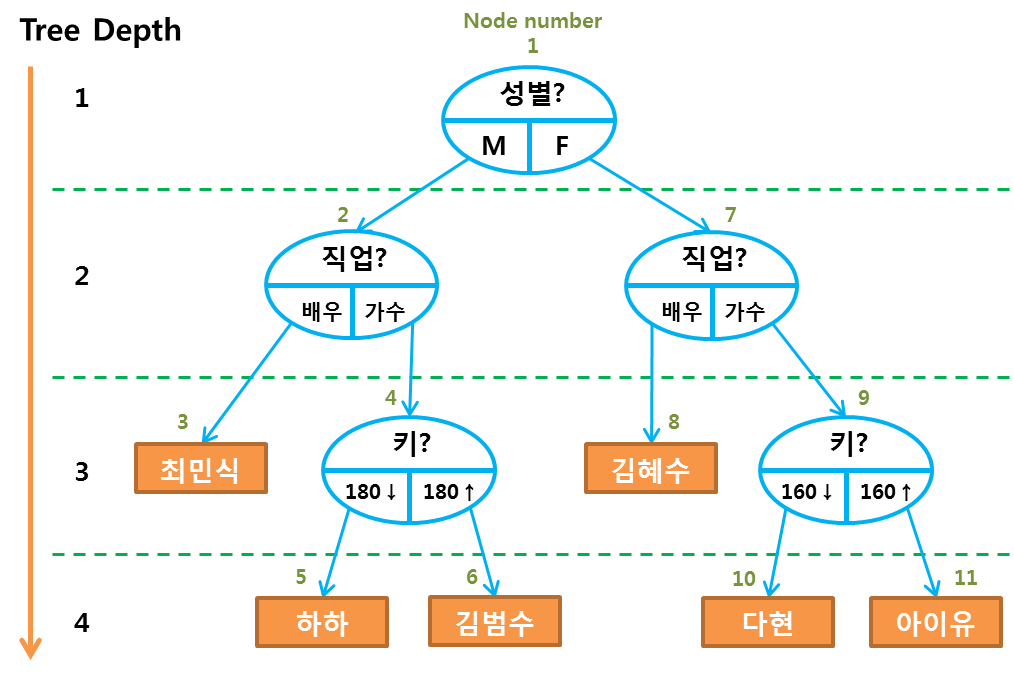

In [5]:
import numpy as np
import pandas as pd


# 직업, 키, 성별로 이름을 구분하는 간단한 이진트리 분류기를 만들어보겠습니다.
name = ['하하', '김범수', '다현', '아이유', '최민식', '김혜수']
job  = ['가수', '가수'  , '가수', '가수'  , '배우'  , '배우']
height = [171, 182, 158, 160, 177, 170]
sex = ['M', 'M', 'F', 'F', 'M', 'F']

# Node 번호를 지정해주기 위한 변수
num = 0

# Node 정보를 저장하기 위한 딕셔너리 생성
node_list = {}

# 데이터 프레임 만들기
data = pd.DataFrame({'이름': name, '직업': job, '키': height,'성별': sex})
print(data,'\n')

    이름  직업    키 성별
0   하하  가수  171  M
1  김범수  가수  182  M
2   다현  가수  158  F
3  아이유  가수  160  F
4  최민식  배우  177  M
5  김혜수  배우  170  F 



In [6]:
"""
1. 성별에 따라 사람을 분류하는 함수를 구현합니다.
"""
def Sex_Node(df, depth):
    # 전역 변수를 함수 내에서 사용하기 위해 Global 선언
    global num
    global node_list
    # Node num, Depth, Node Name 출력
    num +=1
    print('Node_num : {} | Node Depth : {} | Sex_Node'.format(num, depth))
    node_list[num] = 'Sex_Node'
    
    male = []
    female = []
    # 처음 성별 데이터 전체로 분류
    for idx, sex in enumerate(df['성별']):
        # 남자인 경우 Index 저장
        if sex == 'M':
            male.append(idx)
        # 여자인 경우 Index 저장
        elif sex == 'F':
            female.append(idx)
    
    # Index 확인
    print('남자 Index : ',male)
    print('여자 Index : ',female)
    
    # 성별 분류 후 직업을 분류하는 Node를 호출합니다.
    Job_Node(df, male , depth)
    Job_Node(df, female, depth)
    
"""
2. 직업에 따라 사람을 분류하는 함수를 구현합니다.
"""
def Job_Node(df,idx, depth):
    # 전역 변수를 함수 내에서 사용하기 위해 Global 선언
    global num
    global node_list
    num +=1
    
    # Node num, Depth, Node Name 출력
    print('Node_num : {} | Node Depth : {} | Job_Node'.format(num, depth))
    node_list[num] = 'Job_Node'
    
    # Index 저장을 위한 리스트 
    singer = []
    
    for i in idx:
        # 가수인 경우 Index 저장
        if df['직업'][i] == '가수':
            singer.append(i)
            
        # 배우인 경우 Node 번호와 해당 배우의 이름 출력    
        else:
            num += 1
            print('Node_num : {} | Node Depth : {} | Name : {}'.format(num, depth+1 ,data['이름'][i]))
            node_list[num] = data['이름'][i]
    
    # 가수인 경우 분류가 끝나지 않았으므로 Index 출력
    print('가수 Index : ',singer)
    
    # 마지막 분류 기준인 키를 통해 가수를 분류
    Height_Node(df, singer, depth)

"""
3. 키에 따라 사람을 분류하는 함수를 구현합니다.
"""
def Height_Node(df,idx, depth):
    # 전역 변수를 함수 내에서 사용하기 위해 Global 선언
    global num
    global node_list
    num +=1
    # Node num, Depth, Node Name 출력
    print('Node_num : {} | Node Depth : {} | Height_Node'.format(num, depth))
    node_list[num] = 'Height_Node'
    
    for i in idx:
        num +=1
        # 성별에 따라 키의 기준이 다르기 때문에 성별을 우선 분류
        if df['성별'][i] == 'M':
            # 남자의 경우 키에 따라 분류
            # 키가 180보다 작은 경우
            if df['키'][i] < 180:
                print('Node_num : {} | Node Depth : {} | Name : {}'.format(num, depth+1,data['이름'][i]))
                node_list[num] = data['이름'][i]
            # 키가 180보다 큰 경우
            else:
                print('Node_num : {} | Node Depth : {} | Name : {}'.format(num, depth+1,data['이름'][i]))
                node_list[num] = data['이름'][i]
        else:
            # 여자의 경우 키에 따라 분류
            # 키가 160보다 작은 경우
            if df['키'][i] < 160:
                print('Node_num : {} | Node Depth : {} | Name : {}'.format(num, depth+1,data['이름'][i]))
                node_list[num] = data['이름'][i]
            # 키가 160보다 큰 경우
            else:
                print('Node_num : {} | Node Depth : {} | Name : {}'.format(num, depth+1,data['이름'][i]))
                node_list[num] = data['이름'][i]

def main():
    # 첫 번째 분류 기준으로 성별을 설정합니다.
    Sex_Node(data, 1)
    print(node_list)

if __name__=="__main__":
    main()

Node_num : 1 | Node Depth : 1 | Sex_Node
남자 Index :  [0, 1, 4]
여자 Index :  [2, 3, 5]
Node_num : 2 | Node Depth : 1 | Job_Node
Node_num : 3 | Node Depth : 2 | Name : 최민식
가수 Index :  [0, 1]
Node_num : 4 | Node Depth : 1 | Height_Node
Node_num : 5 | Node Depth : 2 | Name : 하하
Node_num : 6 | Node Depth : 2 | Name : 김범수
Node_num : 7 | Node Depth : 1 | Job_Node
Node_num : 8 | Node Depth : 2 | Name : 김혜수
가수 Index :  [2, 3]
Node_num : 9 | Node Depth : 1 | Height_Node
Node_num : 10 | Node Depth : 2 | Name : 다현
Node_num : 11 | Node Depth : 2 | Name : 아이유
{1: 'Sex_Node', 2: 'Job_Node', 3: '최민식', 4: 'Height_Node', 5: '하하', 6: '김범수', 7: 'Job_Node', 8: '김혜수', 9: 'Height_Node', 10: '다현', 11: '아이유'}


## 의사결정트리 - 회귀
max_depth라고 하는, 나무의 최대 깊이를 다양하게 정의할수 있음

회귀 의사결정 나무를 위한 사이킷런 함수/라이브러리
- from sklearn.tree import DecisionTreeRegressor : 사이킷런에 구현되어 있는 회귀 의사결정 나무 모델을 불러옵니다.
- DecisionTreeRegressor(max_depth)
    - max_depth : 트리의 최대 깊이
- [Model].fit(X, y): (X, y) 데이터셋에 대해서 모델을 학습시킵니다.
- [Model].predict(X): X 데이터를 바탕으로 예측되는 값을 출력합니다

In [7]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

from elice_utils import EliceUtils
elice_utils = EliceUtils()

# 랜덤한 데이터 셋을 생성하여 반환하는 함수입니다.
def load_data():
    
    rng = np.random.RandomState(1)
    X = np.sort(5 * rng.rand(80, 1), axis=0)
    y = np.sin(X).ravel()
    y[::5] += 3 * (0.5 - rng.rand(16))
    
    return X, y
"""
1. 회귀 의사결정 나무 모델을 이용하여
   학습 및 예측을 수행한 결과를 반환하는 함수를 구현합니다.
   
   Step01. 회귀를 위한 
           의사결정 나무 모델을 정의합니다.
   
   Step02. 정의한 의사결정 나무 모델을 
           데이터에 맞추어 학습시킵니다.
           
   Step03. 학습된 모델을 이용하여 
           테스트 데이터에 대한 예측을 수행합니다.
"""
def DT_Reg(X, y, X_test, m_depth):
    
    reg = DecisionTreeRegressor(max_depth=m_depth)
    
    reg.fit(X, y)
    
    pred = reg.predict(X_test)
    
    return pred
    
# 회귀를 위한 의사결정 나무 결과를 그래프로 시각화합니다.
def Visualize(X, y, X_test, y_1, y_5, y_20):
    
    plt.figure()
    plt.scatter(X, y, s=20, edgecolor="black",
                c="darkorange", label="data")
    plt.plot(X_test, y_1, color="cornflowerblue",
             label="max_depth=1", linewidth=2)
    plt.plot(X_test, y_5, color="yellowgreen", label="max_depth=5", linewidth=2)
    plt.plot(X_test, y_20, color="red", label="max_depth=20", linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title("Decision Tree Regression")
    plt.legend()
    
    plt.savefig('decision_regressor.png')
    elice_utils.send_image('decision_regressor.png')
    
"""
2. 다양한 max_depth 인자를 설정한
   회귀 의사결정 나무 모델로 
   학습, 예측을 수행한 후 결과를 확인하는 함수를 구현합니다.
   
   Step01. 구현된 DT_Reg 함수를 이용하여 
           각각 max_depth가 1,5,20 인 의사결정 나무 모델로 
           테스트 데이터에 대한 예측을 하고, 그 값을 저장합니다.
"""
def main():
    
    X, y = load_data()
    
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    
    # max_depth = 1
    y_1 = DT_Reg(X, y, X_test, 1)
    
    # max_depth = 5
    y_5 = DT_Reg(X, y, X_test, 5)
    
    # max_depth = 20
    y_20 = DT_Reg(X, y, X_test, 20)
    
    Visualize(X, y, X_test, y_1, y_5, y_20)
    
    return y_1, y_5, y_20
    
if __name__ == "__main__":
    main()
 

ModuleNotFoundError: No module named 'elice_utils'

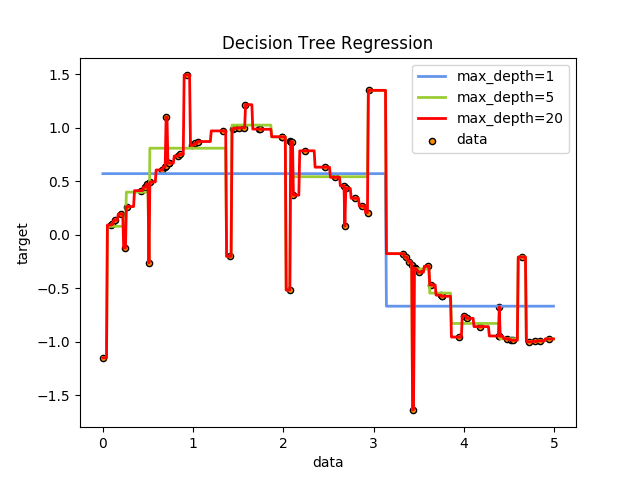

## 의사결정나무 - 분류
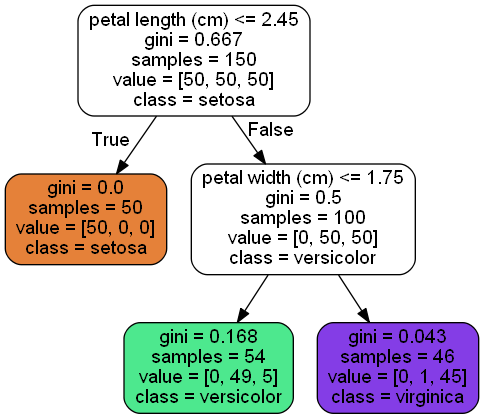

분류 의사결정 나무를 위한 사이킷런 함수/라이브러리
```python
from sklearn.tree import DecisionTreeClassifier : 사이킷런에 구현되어 있는 분류 의사결정 나무 모델을 불러옵니다.
DecisionTreeClassifier(): 분류를 위한 의사결정 나무 모델을 정의합니다.
[Model].fit(X, y): (X, y) 데이터셋에 대해서 모델을 학습시킵니다.
[Model].predict(X): X 데이터를 바탕으로 예측되는 값을 출력합니다
```

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from elice_utils import EliceUtils
elice_utils = EliceUtils()

"""
1. 데이터를 불러오고,
   학습용 데이터와 테스트용 데이터로 분리하여 
   반환하는 함수를 구현합니다.
   
   Step01. 사이킷런에 저장된 데이터를 불러옵니다.
   
   Step02. 불러온 데이터를 
           학습용 데이터(80%)와 테스트용 데이터(20%)로
           분리합니다.
           
           일관된 결과 확인을 위해 random_state는 
           100으로 설정합니다.
"""
def load_data():
    
    X, y = load_iris(return_X_y=True)
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=100)
    
    return train_X, test_X, train_y, test_y
    
"""
2. 분류 의사결정 나무 모델로 
   학습, 예측을 수행한 후 예측 결과를 반환하는 함수를 구현합니다.
   
   Step01. 분류를 위한 
           의사 결정 나무 모델을 정의합니다.
           
   Step02. 의사 결정 나무를 
           학습용 데이터에 대해 학습시킵니다.
           
   Step03. 테스트 데이터에 대한 
           분류 결과를 예측합니다.
"""
def DT_Clf(train_X, train_y, test_X):
    
    clf = DecisionTreeClassifier()
    
    clf.fit(train_X, train_y)
    
    pred = clf.predict(test_X)
    
    return pred

def main():
    
    train_X, test_X, train_y, test_y = load_data()
    
    pred = DT_Clf(train_X, train_y, test_X)
    print('테스트 데이터에 대한 예측 정확도 : {0:.4f}'.format(accuracy_score(test_y, pred)))
    
    return pred
    
if __name__ == "__main__":
    main()
